<a href="https://colab.research.google.com/github/wjh818/Data_hwj/blob/main/Deep_Learning/8_%EC%97%AD%EC%A0%84%ED%8C%8C_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 덧셈 노드
* 순전파 : 단순히 두 값을 더한다.
* 역전파 : 다음 노드로부터 들어온 미분값을 그대로 흘려 보낸다.
* 순전파 시에 입력된 값을 저장하고 있을 필요는 없다.

In [1]:
import numpy as np

class AddLayer:

  def __init__(self):
    pass
  
  # 덧셈 노드로 들어온 값을 더해서 리턴
  def forward(self, x, y):
    out = x + y
    return out

  def backward(self, dout):
    # 모양새 맞추기
    dx = dout * 1
    dy = dout * 1

    return dx, dy

# 곱셈 노드
* 순전파 : 두 값을 곱한다
* 역전파 : 들어온 두 값에 미분값을 곱해서 반대로 전달한다.
* 곱할 값들을 저장하고 있어야 한다. **역전파**시에 미분값을 곱한 다음 반대로 전달해야 하니까

In [2]:
class MulLayer:

  def __init__(self):
    self.x = None
    self.y = None
  

  def forward(self, x, y):
    # 계산할 값들을 노드에 저장하고 있는다.
    self.x = x
    self.y = y

    out = x * y
    return out
  
  def backward(self, dout):
    dx = dout * self.y
    dy = dout * self.x

    return dx, dy

In [3]:
# 사과만 테스트
apple = 100 # 사과 1개당 가격
apple_cnt = 2 # 사과 개수
tax = 1.1 # 소비세

# 계층은 2개가 필요함
# (apple * apple_cnt) * tax

# 레이어 준비
mul_apple_layer = MulLayer()
mul_tax_layer   = MulLayer()

# 순전파 먼저 수행
apple_price = mul_apple_layer.forward(apple, apple_cnt)
price       = mul_tax_layer.forward(apple_price, tax)

print("최종 사과 가격 : {}".format(price))

최종 사과 가격 : 220.00000000000003


In [4]:
# 역전파 구현

dprice = 1 # d돈통 / d포스기
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_cnt = mul_apple_layer.backward(dapple_price)

print("사과 가격 * 사과 개수에 대한 미분값 : {}".format(dapple_price))
print("사과 가격에 대한 미분값 : {}".format(dapple))
print("사과 개수에 대한 미분값 : {}".format(dapple_cnt))
print("소비세에 대한 미분값 : {}".format(dtax))

사과 가격 * 사과 개수에 대한 미분값 : 1.1
사과 가격에 대한 미분값 : 2.2
사과 개수에 대한 미분값 : 110.00000000000001
소비세에 대한 미분값 : 200


In [5]:
# 사과와 귤 계산하기
apple = 100
apple_cnt = 2

orange = 150
orange_cnt = 3

tax = 1.1

## 1 계층
* 각 과일에 대한 개수 계산 ( 과일 가격 * 개수 )

In [6]:
mul_apple_layer = MulLayer() # 사과 개수 * 사과 가격
mul_orange_layer = MulLayer() # 귤 개수 * 귤 가격

## 2 계층
* 사과 총 가격 + 귤 총 가격

In [7]:
add_apple_orange_layer = AddLayer() # 사과 총 가격 + 오렌지 총 가격

## 3 계층
* 과일들의 총 가격 * 소비세

In [8]:
mul_tax_layer = MulLayer() # 과일 총 가격 * 소비세

## 연산 수행 ( 순전파 )

In [9]:
# 1 계층
apple_price = mul_apple_layer.forward(apple, apple_cnt)
orange_price = mul_orange_layer.forward(orange, orange_cnt)

# 2 계층
total_price = add_apple_orange_layer.forward(apple_price, orange_price)

# 3 계층
price = mul_tax_layer.forward(total_price, tax)

print("최종 가격 : {}".format(int(price)))

최종 가격 : 715


## 역전파

In [10]:
dprice = 1 # d돈통 / d포스기

# dprice / dtotal_price, dprice / dtax
dtotal_price, dtax = mul_tax_layer.backward(dprice)

# d돈통 / dapple_price = ( d돈통 / d포스기 ) * (d돈통 / dtotal_price) * (dtotal_price / dapple_price)
dapple_price, dorange_price = add_apple_orange_layer.backward(dtotal_price)

dorange, dorange_cnt = mul_orange_layer.backward(dorange_price)
dapple, dapple_cnt = mul_apple_layer.backward(dapple_price)

print("사과 개수에 대한 미분값 : {}".format(dapple_cnt))
print("사과 가격에 대한 미분값 : {}".format(dapple))

print("귤 개수에 대한 미분값 : {}".format(dorange_cnt))
print("귤 가격에 대한 미분값 : {}".format(dorange))

사과 개수에 대한 미분값 : 110.00000000000001
사과 가격에 대한 미분값 : 2.2
귤 개수에 대한 미분값 : 165.0
귤 가격에 대한 미분값 : 3.3000000000000003


# 신경망 레이어 만들기
* ReLU
* Sigmoid
* Affine 레이어( 기하학 레이어 - Fully Connected, Dense )
* SoftMax + Loss 레이어

## ReLU 구현

In [11]:
class ReLU:
  # mask : 순전파 시에 0이나 음수였던 인덱스를 저장하기 위함
  # mask가 있어야 순전파 때 0이었던 부분을 역전파 때 0으로 만들어 줄 수 있다.
  def __init__(self):
    self.mask = None
  
  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy() # 원본 배열 복사
    out[self.mask] = 0

    return out
  
  # 순전파 때 음수였던 부분을 0으로 만들었음
  # 음수였었던 인덱스를 기억하고 있다가 (self.mask) 미분값 전달시에 해당 인덱스를 0으로 만든다.
  def backward(self, dout):
    dout[self.mask] = 0 
    dx = dout
    
    return dx

In [12]:
x = np.array([ [1.0, -0.5], 
               [-2.0, 3.0] ])

print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [13]:
relu = ReLU()
relu.forward(x)

array([[1., 0.],
       [0., 3.]])

In [14]:
relu.mask

array([[False,  True],
       [ True, False]])

In [15]:
dx = np.array([ [-0.1, 4.0],
                [1.3, -1.1] ])

relu.backward(dx)

array([[-0.1,  0. ],
       [ 0. , -1.1]])

## 시그모이드 구현


$$
\sigma(x) = \frac{\mathrm{1} }{\mathrm{1} + exp(-x)}
$$

$$
y = \sigma(x)
$$

$$
y' = \sigma(x)(1-\sigma(x))
$$

In [16]:
class Sigmoid:
  def __init__(self):
    self.out = None
  
  # 순전파
  def forward(self, x):
    out = 1 / ( 1 + np.exp(-x) )
    self.out = out

    return out
  
  # 역전파
  def backward(self, dout):
    dx = dout * self.out * (1.0 - self.out)
    return dx

## 어파인 계층 구현
* 기하학에서 행렬의 내적을 Affine 변환( Affine Transformation )이라고 합니다.

In [17]:
# 어파인 변환 알아보기
X = np.random.rand(2) # 입력
W = np.random.rand(2, 3) # 가중치
B = np.random.rand(3) # 편향

X.shape, W.shape, B.shape

((2,), (2, 3), (3,))

In [18]:
Y = np.dot(X, W) + B
print(Y)

[0.37229624 0.35639051 0.72489276]


In [19]:
class Affine:

  def __init__(self, W, b):
    self.W = W
    self.b = b

    self.x = None

    # 방어코드 (원본 x의 모양이 흩트러 지는 것을 방지하기 위함)
    self.original_x_shape = None

    # 최적화(Optimization)을 위해 각 매개변수의 미분값을 가지고 있어야 한다. 추후에 경사하강법 등을 구현하기 위해 사용
    # dW, db를 update 하는 것을 <<학습>>
    self.dW = None
    self.db = None

  def forward(self, x):
    # 텐서 대응( 배치마다의 데이터 개수를 평평하게 세울것임) -> 몇차원 배열이 들어오든 (N, M)으로 만들 것임
    # 예를 들면 (3, 4, 4) -> 제일 앞에 있는 3이 배치의 개수를 의미한다. -> (3, 16)
    # (100, 28, 28, 1) -> (100, 784)
    self.original_x_shape = x.shape
    x = x.reshape(x.shape[0], -1) # shape[0] : batch_size

    self.x = x

    out = np.dot(self.x, self.W) + self.b
    return out
  

  def backward(self, dout):
    # dL / dx -> dout * W의 전치행렬
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)

    # dx를 원본 형상으로 복구
    dx = dx.reshape(*self.original_x_shape) # (12, 3) -> *(12, 3) -> 12, 3 *을 붙이면 튜플이 순서대로 언패킹 됩니다.
    return dx

## SoftmaxWithLoss 계층
* softmax에 의한 분류 및 cee를 활용한 손실함수를 동시에 구현
* 순전파 시에는 softmax 적용 후 loss 적용
  * 정답 레이블, 예측 레이블(소프트맥스 결과물), loss를 갖는다.
* 역전파 시에 오차를 구해서 이전층에 전달해야 한다.

In [20]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [21]:
from common.functions import softmax, cross_entropy_error

class SoftmaxWithLoss:

  def __init__(self):
    self.loss = None # 손실값
    self.y = None # 예측값
    self.t = None # 정답 레이블

  '''
    x : 이전 층에서 들어온 값
    t : 정답 레이블
  '''
  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)

    return self.loss
  
  def backward(self, dout=1):
    batch_size = self.t.shape[0]

    if self.t.size == self.y.size: # 출력층의 원소의 개수를 비교하는 것은 원-핫 인코딩이 되어있는 레이블이라는 뜻이다.
      dx = (self.y - self.t) / batch_size
    
    else:
      dx = self.y.copy()
      dx[np.arange(batch_size), self.t] -= 1
      dx = dx / batch_size

    return dx

# 네트워크 생성 및 조립

In [23]:
# 레이어마다 이름을 붙여주고, 레이어의 추가순서를 항상 유지
# 원래 딕셔너리를 활용했는데, 일반 딕셔너리는 데이터 추가의 순서를 유지 하지 않는다.
# 키값도 사용하면서, 동시에 레이어 추가 순서도 유지하기 위해 OrderedDict

from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:

  def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):

    # 매개변수 초기화
    self.params = {}
    self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params["b1"] = np.zeros(hidden_size)

    self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params["b2"] = np.zeros(output_size)

    # 레이어 만들기
    self.layers = OrderedDict()

    # Fully Connected #1
    self.layers["Affine1"] = Affine(self.params["W1"], self.params["b1"])
    # Activation
    self.layers["Relu"] = ReLU()

    # Fully Conncted #2 (출력층)
    self.layers["Affine2"] = Affine(self.params["W2"], self.params["b2"])

    self.lastLayer = SoftmaxWithLoss()

  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)
    
    return x

  def loss(self, x, t):
    y = self.predict(x)
    return self.lastLayer.forward(y, t)
  
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)

    # 원-핫 인코딩 처리
    if t.ndim != 1 : t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  # 기울기 구하기 (역전파를 활용해서)
  def gradient(self, x, t):
    # 순전파
    self.loss(x, t)

    # 역전파
    dout = 1 # dL / dL
    dout = self.lastLayer.backward(dout)  # 순수한 오차가 구해짐

    layers = list(self.layers.values()) # 레이어를 모두 가지고 온 다음
    layers.reverse() # 순서 뒤집기

    for layer in layers:
      dout = layer.backward(dout)

    # 구해진 기울기 배열 저장
    grads = {}
    grads["W1"], grads["b1"] = self.layers["Affine1"].dW, self.layers["Affine1"].db
    grads["W2"], grads["b2"] = self.layers["Affine2"].dW, self.layers["Affine2"].db    

    return grads

  # 기울기 구하기 ( 수치미분 )
  def numerical_gradient_params(self, x, t):
    loss_W = lambda W: self.loss(x, t)
        
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
    return grads

수치미분과 오차역전파를 했을 때의 기울기 비교

In [24]:
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

from sklearn.preprocessing import OneHotEncoder

y_train_dummy = OneHotEncoder().fit_transform(y_train.reshape(-1, 1))
y_train_dummy = y_train_dummy.toarray()

y_test_dummy = OneHotEncoder().fit_transform(y_test.reshape(-1, 1))
y_test_dummy = y_test_dummy.toarray()

# feature 전처리
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = X_train / 255.0 # 이미지 정규화 기법. 255.0 으로 나눠주면 모든 픽셀 데이터가 0 ~ 1사이의 값을 갖게 되고, 훈련이 쉽게 된다.

X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test / 255.0

X_train.shape, X_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 784), (10000, 784))

In [25]:
network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

X_batch = X_train[:3]
t_batch = y_train[:3]

# 수치미분을 활용한 기울기배열
grad_numerical = network.numerical_gradient_params(X_batch, t_batch)
grad_backprop  = network.gradient(X_batch, t_batch)

# 각 가중치의 절댓값의 차를 구한 다음 그 절댓값들의 평균 내기
for key in grad_numerical.keys():
  diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
  print("key : {}".format(diff))

key : 3.6334697910408976e-10
key : 2.282751886597406e-09
key : 4.893728767760255e-09
key : 1.402144184398102e-07


MNIST로 테스트 해보자

In [26]:
network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

iters_num = 10000

# 미니 배치 때문에 선언함
train_size = X_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) # 에폭 횟수 구하기

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  X_batch = X_train[batch_mask]
  t_batch = y_train[batch_mask]

  # 기울기 계산
  # grads = network.numerical_gradient_params(X_batch, t_batch) # 수치미분은 사용 안해
  grads = network.gradient(X_batch, t_batch) # 오차 역전파 방식

  # 경사하강법을 이용한 매개변수 갱신

  for key in ("W1", "b1", "W2", "b2"):
    network.params[key] -= learning_rate * grads[key]
  
  loss = network.loss(X_batch, t_batch)

  # 에폭 : 배치데이터를 가지고 모든 데이터를 탐색 했다면 1 에폭이 된다.
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(X_train, y_train)
    test_acc  = network.accuracy(X_test, y_test)
    
    train_loss_list.append(loss)

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    print("Train Accuracy : {:.6f} / Test Accuracy : {:.6f}".format(train_acc, test_acc))

Train Accuracy : 0.120067 / Test Accuracy : 0.124800
Train Accuracy : 0.904800 / Test Accuracy : 0.906600
Train Accuracy : 0.920867 / Test Accuracy : 0.924100
Train Accuracy : 0.935033 / Test Accuracy : 0.934400
Train Accuracy : 0.944283 / Test Accuracy : 0.942200
Train Accuracy : 0.949933 / Test Accuracy : 0.949700
Train Accuracy : 0.958317 / Test Accuracy : 0.956000
Train Accuracy : 0.962350 / Test Accuracy : 0.958000
Train Accuracy : 0.965150 / Test Accuracy : 0.961400
Train Accuracy : 0.968083 / Test Accuracy : 0.963500
Train Accuracy : 0.970500 / Test Accuracy : 0.964200
Train Accuracy : 0.972517 / Test Accuracy : 0.966100
Train Accuracy : 0.974633 / Test Accuracy : 0.966800
Train Accuracy : 0.975250 / Test Accuracy : 0.966000
Train Accuracy : 0.977617 / Test Accuracy : 0.969500
Train Accuracy : 0.977367 / Test Accuracy : 0.970000
Train Accuracy : 0.980533 / Test Accuracy : 0.970700


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

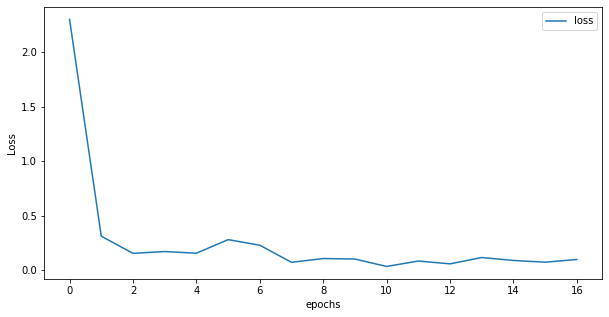

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_loss_list)), train_loss_list, label="loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

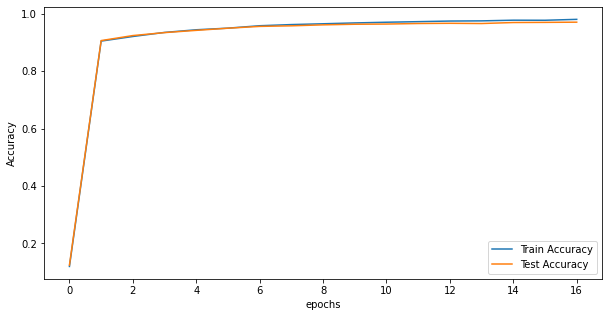

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_acc_list)), train_acc_list, label="Train Accuracy")
plt.plot(np.arange(len(test_acc_list)), test_acc_list, label="Test Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()